# IMPORTING LIBRARIES

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords_ = stopwords.words('english')
from sklearn import metrics

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Zoe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# importing dataset

In [3]:
df = pd.read_csv(r'C:\Users\Zoe\OneDrive\Desktop\deploy3\env3\spam.csv', encoding = 'latin-1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
#checking null values and dropping it
df.isnull().sum() # no null values

#dropping unwanted columns
df = df.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1)

In [5]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
#changing column names
df.columns = ['class', 'text']
df.head()

,class,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
df.describe()

,class,text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [8]:
df.groupby('class').describe().T

class                           ham  \
text count                     4825   
     unique                    4516   
     top     Sorry, I'll call later   
     freq                        30   

class                                                     spam  
text count                                                 747  
     unique                                                653  
     top     Please call our customer service representativ...  
     freq                                                    4

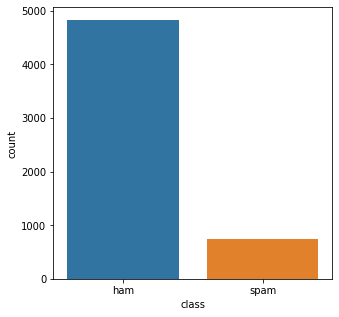

In [9]:
#countplot for class
plt.figure(figsize = (5, 5))
sns.countplot(x = df['class'])
plt.show()

we can see that, Texts which are classified as Ham seems to be in larger number compared to Spam .

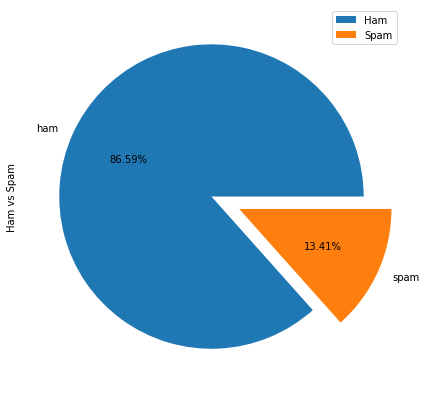

In [10]:
#pie chart for class
df['class'].value_counts().plot(kind = 'pie', explode = [0, 0.2], figsize = (7, 7), autopct = '%1.2f%%')
plt.ylabel('Ham vs Spam')
plt.legend(['Ham', 'Spam'])
plt.show()


The class consists of 86% Ham and 14% Spam.

In [11]:
#applyying text length
df['length'] = df['text'].apply(len)
df.head()

,class,text,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [12]:
df['length'].describe() #retrieving insights through text length

count    5572.000000
mean       80.118808
std        59.690841
min         2.000000
25%        36.000000
50%        61.000000
75%       121.000000
max       910.000000
Name: length, dtype: float64

- Here we can observe, max text length is 910 whereas min text length i 2. 
- to check whether it is ham and spam we need to plot histogram.

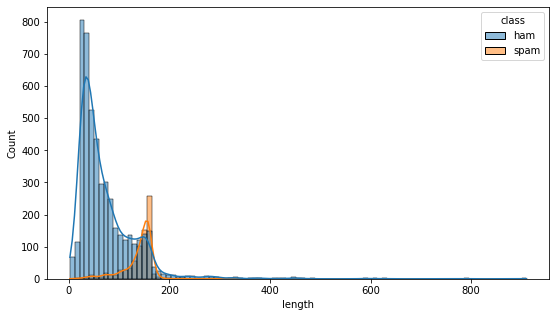

In [13]:
plt.figure(figsize=(9, 5))
sns.histplot(x = df['length'], hue = df['class'], kde = True)
plt.show()

- With the help of histplot we can see that, Ham has the maximum text length, on the other hand spam's text length is minimum.
- We can conclude that, Text which contains maimum text length is likely to be Ham.

# Text Cleaning.
- removing unwanted characters/ stopwords etc..

In [14]:
import string
import regex as re
from nltk.stem.porter import PorterStemmer
from nltk.stem import SnowballStemmer
snowball = SnowballStemmer('english')
port = PorterStemmer()

def clean_text(text):
    text = text.translate(str.maketrans('text', 'text', string.punctuation)) #removing punctuations
    text = re.sub('^[a-zA-Z]', ' ', text) #replacing alphabets with space
    text = text.lower() #converting to lower
    text = text.split() #splitting
    words = [port.stem(word) for word in text if word not in stopwords_] #stemming
    return " ".join(words) 

df['text'] = df['text'].apply(clean_text)

In [15]:
df['text']

0       jurong point crazi avail bugi n great world la...
1                                    k lar joke wif u oni
2       ree entri 2 wkli comp win fa cup final tkt 21s...
3                       dun say earli hor u c alreadi say
4                ah dont think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u u å£750 pound prize 2...
5568                          ill ì b go esplanad fr home
5569                               iti mood soani suggest
5570    guy bitch act like id interest buy someth els ...
5571                                        ofl true name
Name: text, Length: 5572, dtype: object

In [16]:
#seperating spam and ham
spam_text = df[df['class'] =='spam']['text']
ham_text = df[df['class']=='ham']['text']

In [17]:
spam_text[:10] #spam text

2     ree entri 2 wkli comp win fa cup final tkt 21s...
5     reemsg hey darl 3 week word back id like fun s...
8     inner valu network custom select receivea å£90...
9     ad mobil 11 month u r entitl updat latest colo...
11    ix chanc win cash 100 20000 pound txt csh11 se...
12    rgent 1 week free membership å£100000 prize ja...
15    xxmobilemovieclub use credit click wap link ne...
19    ngland v macedonia dont miss goalsteam news tx...
34    hank subscript rington uk mobil charg å£5month...
42    07732584351 rodger burn msg tri call repli sm ...
Name: text, dtype: object

In [18]:
ham_text[:10] #ham text

0     jurong point crazi avail bugi n great world la...
1                                  k lar joke wif u oni
3                     dun say earli hor u c alreadi say
4              ah dont think goe usf live around though
6          ven brother like speak treat like aid patent
7     per request mell mell oru minnaminungint nurun...
10    gonna home soon dont want talk stuff anymor to...
13    search right word thank breather promis wont t...
14                                          date sunday
16                                          h kim watch
Name: text, dtype: object

In [19]:
from nltk.tokenize import word_tokenize
spam_words = []
ham_words = []
def extractSpam(spam_t):
    global spam_words
    words = [word for word in word_tokenize(spam_t)]
    spam_words = spam_words+words
    
def extractHam(ham_t):
    global ham_words
    words = [word for word in word_tokenize(ham_t)]
    ham_words = ham_words+words
    
spam_text.apply(extractSpam)
ham_text.apply(extractHam)

0       None
1       None
3       None
4       None
6       None
        ... 
5565    None
5568    None
5569    None
5570    None
5571    None
Name: text, Length: 4825, dtype: object

In [20]:
spam_words

['ree',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 '2005',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'questionstd',
 'txt',
 'ratetc',
 'appli',
 '08452810075over18',
 'reemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'id',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'å£150',
 'rcv',
 'inner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'å£900',
 'prize',
 'reward',
 'claim',
 'call',
 '09061701461',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'ad',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'ix',
 'chanc',
 'win',
 'cash',
 '100',
 '20000',
 'pound',
 'txt',
 'csh11',
 'send',
 '87575',
 'cost',
 '150pday',
 '6day',
 '16',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'rgent',
 '1',
 'week',
 'free',
 'membership',
 'å£100000',

In [21]:
ham_words

['jurong',
 'point',
 'crazi',
 'avail',
 'bugi',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amor',
 'wat',
 'k',
 'lar',
 'joke',
 'wif',
 'u',
 'oni',
 'dun',
 'say',
 'earli',
 'hor',
 'u',
 'c',
 'alreadi',
 'say',
 'ah',
 'dont',
 'think',
 'goe',
 'usf',
 'live',
 'around',
 'though',
 'ven',
 'brother',
 'like',
 'speak',
 'treat',
 'like',
 'aid',
 'patent',
 'per',
 'request',
 'mell',
 'mell',
 'oru',
 'minnaminungint',
 'nurungu',
 'vettam',
 'set',
 'callertun',
 'caller',
 'press',
 '9',
 'copi',
 'friend',
 'callertun',
 'gon',
 'na',
 'home',
 'soon',
 'dont',
 'want',
 'talk',
 'stuff',
 'anymor',
 'tonight',
 'k',
 'ive',
 'cri',
 'enough',
 'today',
 'search',
 'right',
 'word',
 'thank',
 'breather',
 'promis',
 'wont',
 'take',
 'help',
 'grant',
 'fulfil',
 'promis',
 'wonder',
 'bless',
 'time',
 'date',
 'sunday',
 'h',
 'kim',
 'watch',
 'h',
 'u',
 'rememb',
 '2',
 'spell',
 'name',
 'ye',
 'v',
 'naughti',
 'make',
 'v',
 'wet',
 'ine

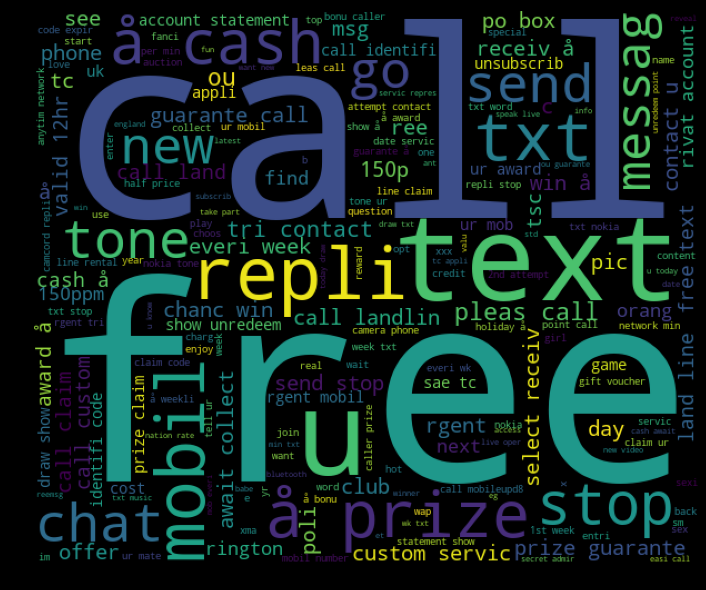

In [22]:
#word cloud for spam
from wordcloud import WordCloud
spam_wc = WordCloud(width = 600, height= 500).generate(" ".join(spam_words))
plt.figure(figsize=(10, 8), facecolor='k')
plt.imshow(spam_wc)
plt.tight_layout(pad=0)
plt.show()

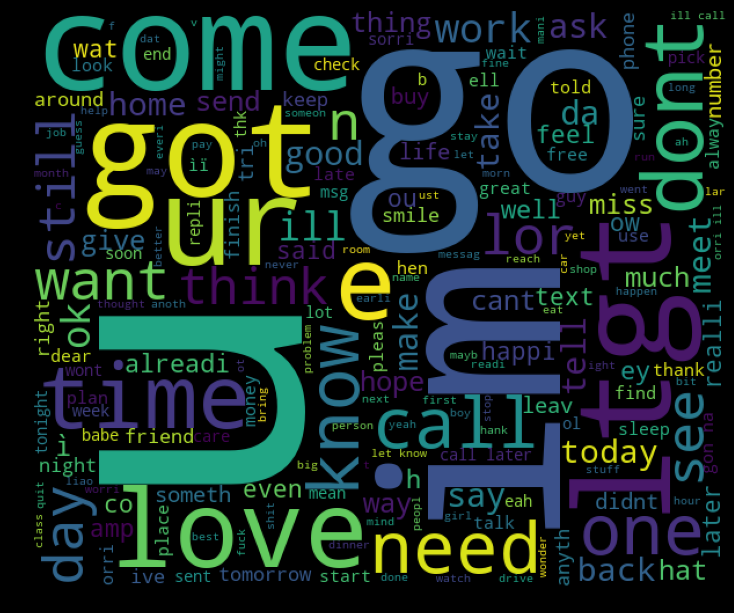

In [23]:
#wordcloud for ham
ham_wc = WordCloud(width=600, height=500).generate(" ".join(ham_words))
plt.figure(figsize=(10, 9), facecolor='k')
plt.imshow(ham_wc)
plt.tight_layout(pad=0)
plt.show()

In [24]:
def encoding(cat):
    if cat == 'spam':
        return 1
    else:
        return 0
    
df['class'] = df['class'].apply(encoding)

In [25]:
spam_words

['ree',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 '2005',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'questionstd',
 'txt',
 'ratetc',
 'appli',
 '08452810075over18',
 'reemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'id',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'å£150',
 'rcv',
 'inner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'å£900',
 'prize',
 'reward',
 'claim',
 'call',
 '09061701461',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'ad',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'ix',
 'chanc',
 'win',
 'cash',
 '100',
 '20000',
 'pound',
 'txt',
 'csh11',
 'send',
 '87575',
 'cost',
 '150pday',
 '6day',
 '16',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'rgent',
 '1',
 'week',
 'free',
 'membership',
 'å£100000',

In [26]:
#count vectorizer
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(df["text"])
X.shape

(5572, 8379)

In [27]:
#bag of words
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer(encoding = 'latin-1', strip_accents='unicode')
features = vec.fit_transform(df['text'])
features.shape


(5572, 8373)

In [28]:

X = cv.fit(df['text'])
X.vocabulary_
X.get_feature_names()

['008704050406',
 '0089mi',
 '0121',
 '01223585236',
 '01223585334',
 '0125698789',
 '02',
 '020603',
 '0207',
 '02070836089',
 '02072069400',
 '02073162414',
 '02085076972',
 '020903',
 '021',
 '050703',
 '0578',
 '06',
 '060505',
 '061104',
 '07008009200',
 '07046744435',
 '07090201529',
 '07090298926',
 '07099833605',
 '071104',
 '07123456789',
 '0721072',
 '07732584351',
 '07734396839',
 '07742676969',
 '07753741225',
 '0776xxxxxxx',
 '07786200117',
 '077xxx',
 '078',
 '07801543489',
 '07808',
 '07808247860',
 '07808726822',
 '07815296484',
 '07821230901',
 '0784987',
 '0789xxxxxxx',
 '0794674629107880867867',
 '0796xxxxxx',
 '07973788240',
 '07xxxxxxxxx',
 '0800',
 '08000407165',
 '08000776320',
 '08000839402',
 '08000930705',
 '08000938767',
 '08001950382',
 '08002888812',
 '08002986030',
 '08002986906',
 '08002988890',
 '08006344447',
 '0808',
 '08081263000',
 '08081560665',
 '0825',
 '0844',
 '08448350055',
 '08448714184',
 '0845',
 '08450542832',
 '08452810071',
 '08452810073'

In [29]:
X = cv.fit_transform(df['text']).toarray() 
X


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [30]:
df2 = pd.DataFrame(X, columns= cv.get_feature_names())
df
df2['len'] = df['length']

In [31]:
df2

,008704050406,0089mi,0121,01223585236,01223585334,0125698789,02,020603,0207,02070836089,...,ìïll,ûthank,ûªm,ûªt,ûªve,ûï,ûïharri,ûò,ûówel,len
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,111
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,29
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,155
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,49
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,161
5568,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,37
5569,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,57
5570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,125


In [32]:
y = df['class']

In [33]:
#splitting
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df2, y, test_size=0.2, random_state=1)

In [34]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, confusion_matrix, roc_auc_score, classification_report
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB


In [35]:
def model_selection(func):
    model = func
    model.fit(x_train, y_train)

    pred = model.predict(x_test)
    print("accuracy score : ", accuracy_score(y_test, pred))
    print("precision_Score: ",precision_score(y_test, pred))
    print("f1 score: ",f1_score(y_test, pred))
    print("roc_auc_score: ",roc_auc_score(y_test, pred))
    print("confusion matrix: ",confusion_matrix(y_test, pred))

In [36]:
from sklearn.ensemble import RandomForestClassifier
model_selection(RandomForestClassifier())

accuracy score :  0.9847533632286996
precision_Score:  0.9765625
f1 score:  0.9363295880149812
roc_auc_score:  0.9481034025238825
confusion matrix:  [[973   3]
 [ 14 125]]


In [37]:
from sklearn.neighbors import KNeighborsClassifier
model_selection(KNeighborsClassifier())

accuracy score :  0.9461883408071748
precision_Score:  0.8376068376068376
f1 score:  0.765625
roc_auc_score:  0.8427843790541337
confusion matrix:  [[957  19]
 [ 41  98]]


In [38]:
from sklearn.tree import DecisionTreeClassifier
model_selection(DecisionTreeClassifier())

accuracy score :  0.968609865470852
precision_Score:  0.8714285714285714
f1 score:  0.8745519713261649
roc_auc_score:  0.9296276093878995
confusion matrix:  [[958  18]
 [ 17 122]]


In [39]:
model_selection(SVC())

accuracy score :  0.8753363228699551
precision_Score:  0.0
f1 score:  0.0
roc_auc_score:  0.5
confusion matrix:  [[976   0]
 [139   0]]


C:\Users\Zoe\anaconda3\envs\env3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [40]:
from sklearn.linear_model import LogisticRegression
model_selection(LogisticRegression())

C:\Users\Zoe\anaconda3\envs\env3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


accuracy score :  0.9883408071748879
precision_Score:  0.9846153846153847
f1 score:  0.9516728624535317
roc_auc_score:  0.9594070645123246
confusion matrix:  [[974   2]
 [ 11 128]]


In [42]:
from sklearn.ensemble import AdaBoostClassifier
model_selection(AdaBoostClassifier())

accuracy score :  0.9775784753363229
precision_Score:  0.9384615384615385
f1 score:  0.9070631970260222
roc_auc_score:  0.9347505602075715
confusion matrix:  [[968   8]
 [ 17 122]]


In [44]:
from sklearn.ensemble import BaggingClassifier
model_selection(BaggingClassifier())

accuracy score :  0.9641255605381166
precision_Score:  0.8721804511278195
f1 score:  0.8529411764705883
roc_auc_score:  0.9085571706569172
confusion matrix:  [[959  17]
 [ 23 116]]


In [45]:
model_selection(MultinomialNB())

accuracy score :  0.9820627802690582
precision_Score:  0.9407407407407408
f1 score:  0.927007299270073
roc_auc_score:  0.9527361717183631
confusion matrix:  [[968   8]
 [ 12 127]]


In [46]:
model_selection(GaussianNB())

accuracy score :  0.8825112107623319
precision_Score:  0.5161290322580645
f1 score:  0.661498708010336
roc_auc_score:  0.8989562448401934
confusion matrix:  [[856 120]
 [ 11 128]]


In [47]:
model_selection(BernoulliNB())

accuracy score :  0.9802690582959641
precision_Score:  0.975609756097561
f1 score:  0.916030534351145
roc_auc_score:  0.9301177910130912
confusion matrix:  [[973   3]
 [ 19 120]]


Multinomial Naive Bayes Performed well compared to other models.

In [58]:
#moving forward with MultinomialNB

model = MultinomialNB()
model.fit(x_train, y_train)

pred = model.predict(x_test)
print('accuracy_score: ', accuracy_score(y_test, pred))
confusion_matrix(y_test, pred)

accuracy_score:  0.9820627802690582


array([[968,   8],
       [ 12, 127]], dtype=int64)

In [49]:
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.91      0.94      0.93       135

    accuracy                           0.98      1115
   macro avg       0.95      0.96      0.96      1115
weighted avg       0.98      0.98      0.98      1115



As a result this model will be built using Naive Bayes, though it gave us the better accuracy compared to others models. Thank You!